In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../data/covid19_tweets.csv')

# Show first few rows
df.head()


user_name         user_location  \
0           ᏉᎥ☻լꂅϮ            astroworld   
1    Tom Basile 🇺🇸          New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites  user_verified  \
0             624           950            18775          False   
1            2253          1677               24           True   
2            9275          9525             7254          False   
3             197           987             1488          False   
4          101009           168              101          False   

                  date                                               text  \
0  2020-07-25 12:27:21  If I smelled the scent of hand sanitizers toda...   
1  2020-07-25 12:27:17  Hey @Yankees @YankeesPR and @MLB - wouldn't it...   
2  2020-07-25 12:27:14  @diane3443 @wdunlap @realDonaldTrump Trump nev...   
3  2020-07-25 12:27:10  @brookbanktv The one gift #COVID19 has give me...   
4  2020-07-25 12:27:08  25 July : Media Bulletin on Novel #CoronaVirus...   

                            hashtags               source  is_retweet  
0                                NaN   Twitter for iPhone       False  
1                                NaN  Twitter for Android       False  
2                        ['COVID19']  Twitter for Android       False  
3                        ['COVID19']   Twitter for iPhone       False  
4  ['CoronaVirusUpdates', 'COVID19']  Twitter for Android       False

In [5]:
# Dataset shape and column types
df.info()

# Check for missing values
df.isnull().sum()

# Display a few tweet texts
df['text'].sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


128628    @JoeBiden @KamalaHarris Whistleblower Dr LiMen...
90723     🎥It was great to visit #Blyth Job Centre this ...
50274     @philscowcroft @z_chrissie It probably voted R...
49764     My workout habits since the arrival of Covid/l...
140478    Our partners @D2N2GrowthHub are currently work...
Name: text, dtype: object

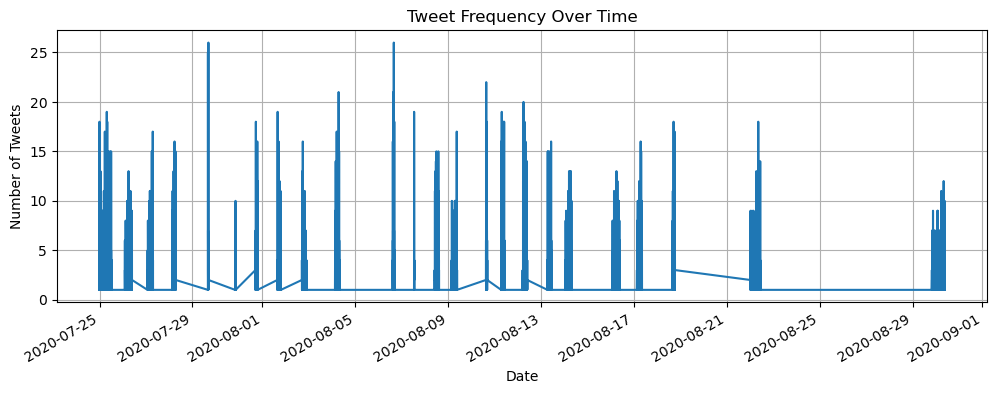

In [6]:
# Convert date to datetime type
df['date'] = pd.to_datetime(df['date'])

# Plot number of tweets per day
df['date'].value_counts().sort_index().plot(kind='line', figsize=(12, 4), title='Tweet Frequency Over Time')
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.grid()
plt.show()


In [7]:
import re
import string

def clean_tweet(text):
    text = str(text)
    text = text.lower()  # Lowercase text
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#','', text)  # Remove mentions and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Apply cleaning to the 'text' column
df['clean_text'] = df['text'].apply(clean_tweet)

# Show before and after
df[['text', 'clean_text']].sample(5)


text  \
105484  A new hot spot for #COVID19, More than 2.2 mil...   
55104   ⁦@GovRonDeSantis⁩ DEATHS in #FLORIDA #COVID19 ...   
174988  @VicGovDHHS What are the figures of deaths FRO...   
114506  @dbseymour Help me choose between @actparty &a...   
76916   How many times have you failed?\nFollow: @dogm...   

                                               clean_text  
105484  a new hot spot for covid more than million ind...  
55104       deaths in florida covid floridacovidepicenter  
174988  what are the figures of deaths from covid not ...  
114506  help me choose between amp david do you believ...  
76916   how many times have you failed follow dogs dog...

In [8]:
from collections import Counter

all_words = ' '.join(df['clean_text']).split()
word_freq = Counter(all_words)

# Show top 10 most common words
word_freq.most_common(10)


[('covid', 114446),
 ('the', 105944),
 ('to', 75045),
 ('of', 59907),
 ('in', 54660),
 ('a', 47929),
 ('and', 44894),
 ('is', 34582),
 ('for', 31613),
 ('on', 23827)]

In [9]:
#!pip install wordcloud


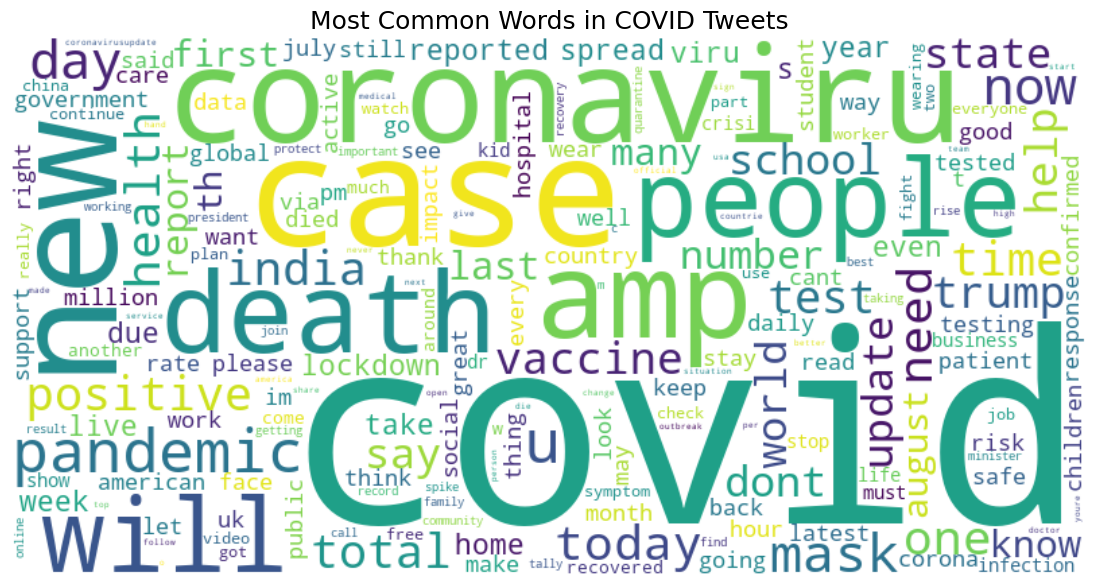

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all cleaned tweets into one string
all_words = ' '.join(df['clean_text'])

# Generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    collocations=False  # Avoids combining common pairs like "thank you"
).generate(all_words)

# Display the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in COVID Tweets', fontsize=18)
plt.show()


In [11]:
#!pip install vaderSentiment


In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment score
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

# Apply to cleaned tweets
df['sentiment_score'] = df['clean_text'].apply(get_sentiment)

# Classify sentiment as Positive, Neutral, or Negative
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_label'] = df['sentiment_score'].apply(classify_sentiment)

# Show results
df[['clean_text', 'sentiment_score', 'sentiment_label']].sample(5)


clean_text  sentiment_score  \
72195   is there a gender divide between people that t...           0.4404   
8939    pandemic hits poor vulnerablecr bangladeshis n...          -0.4767   
99817   jane goodall on speaking utter sense are we go...           0.0000   
137963  covid is here and these numbers are real i wan...          -0.2746   
104581  three major scientific controversies about cor...           0.0000   

       sentiment_label  
72195         Positive  
8939          Negative  
99817          Neutral  
137963        Negative  
104581         Neutral

C:\Users\nehaf\AppData\Local\Temp\ipykernel_27512\3888874552.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', order=['Positive', 'Neutral', 'Negative'], palette='coolwarm')


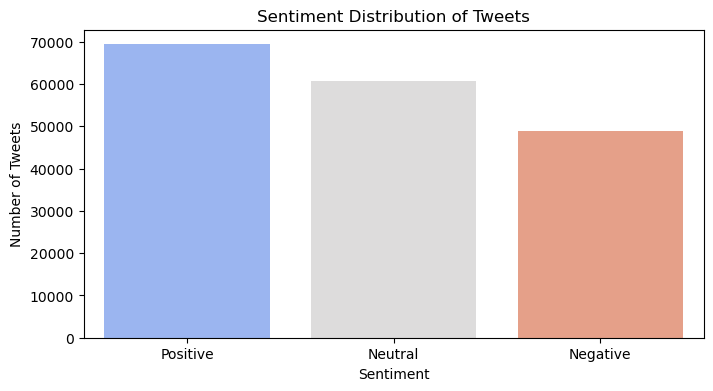

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='sentiment_label', order=['Positive', 'Neutral', 'Negative'], palette='coolwarm')
plt.title("Sentiment Distribution of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


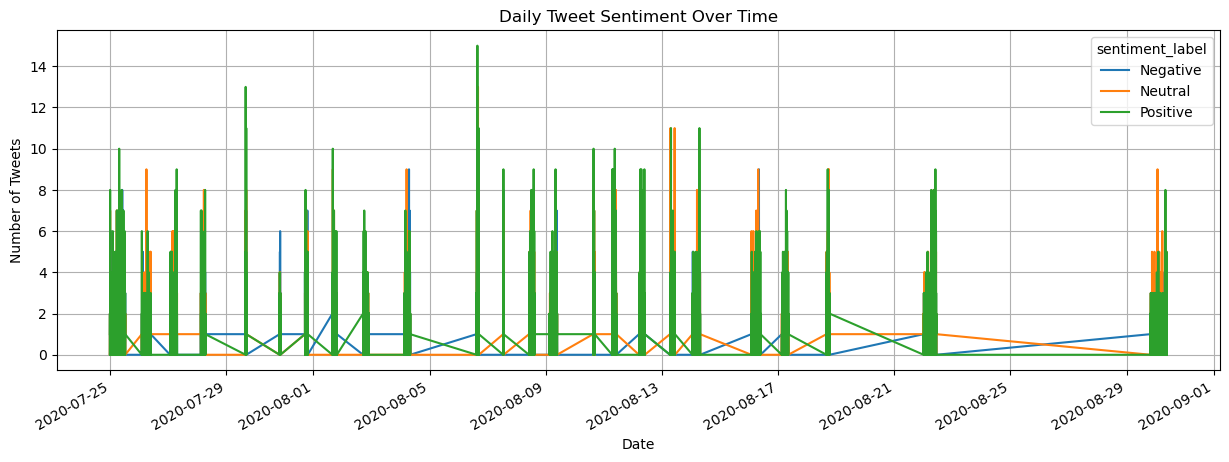

In [14]:
# Group by date and sentiment
daily_sentiment = df.groupby(['date', 'sentiment_label']).size().unstack().fillna(0)

# Plot
daily_sentiment.plot(kind='line', figsize=(15, 5))
plt.title("Daily Tweet Sentiment Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.grid()
plt.show()


In [15]:
df['user_location']


0                         astroworld
1                       New York, NY
2                   Pewee Valley, KY
3               Stuck in the Middle 
4                  Jammu and Kashmir
                     ...            
179103               Ilorin, Nigeria
179104                       Ontario
179105                     🇨🇦 Canada
179106                 New York City
179107    Aliwal North, South Africa
Name: user_location, Length: 179108, dtype: object

In [16]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapi")

# Try a few manually
print(geolocator.geocode("New York"))
print(geolocator.geocode("Delhi"))
print(geolocator.geocode("London"))


City of New York, New York, United States
Delhi, India
London, Greater London, England, United Kingdom


In [30]:
top_locations = df['user_location'].dropna().value_counts().head(100)
top_locations = top_locations.index.tolist()
top_locations[:10]  # Show first 10


['India',
 'United States',
 'New Delhi, India',
 'Mumbai, India',
 'Washington, DC',
 'London, England',
 'United Kingdom',
 'London',
 'New York, NY',
 'Australia']

In [32]:
from geopy.geocoders import Nominatim
from time import sleep

geolocator = Nominatim(user_agent="geoapi")
location_map = {}

for loc in top_locations:
    try:
        geo = geolocator.geocode(loc, language='en', timeout=10)
        if geo:
            address = geo.raw.get('display_name', '')
            country = address.split(',')[-1].strip()
            location_map[loc] = country
        else:
            location_map[loc] = None
    except Exception as e:
        location_map[loc] = None
    sleep(1)  # To avoid being blocked


In [34]:
df['location_clean'] = df['user_location'].map(location_map)


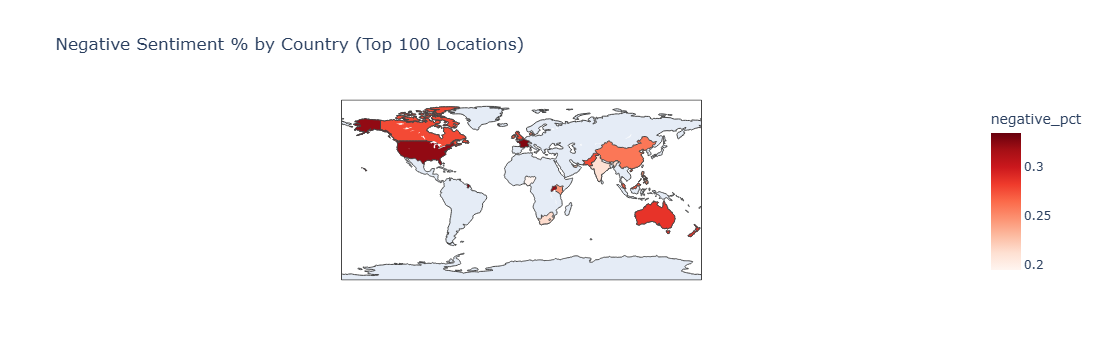

In [36]:
import plotly.express as px

location_sentiment = df.dropna(subset=['location_clean']).groupby(['location_clean', 'sentiment_label']).size().unstack().fillna(0)

location_sentiment['total'] = location_sentiment.sum(axis=1)
location_sentiment['negative_pct'] = location_sentiment['Negative'] / location_sentiment['total']

fig = px.choropleth(
    location_sentiment,
    locations=location_sentiment.index,
    locationmode='country names',
    color='negative_pct',
    hover_name=location_sentiment.index,
    color_continuous_scale='Reds',
    title='Negative Sentiment % by Country (Top 100 Locations)'
)
fig.show()


In [38]:
# Group by country and sentiment label
location_sentiment = df.dropna(subset=['location_clean']).groupby(['location_clean', 'sentiment_label']).size().unstack().fillna(0)

# Total tweets per country
location_sentiment['total'] = location_sentiment.sum(axis=1)

# Percent of negative tweets
location_sentiment['negative_pct'] = location_sentiment['Negative'] / location_sentiment['total']


In [46]:
top_negative_pct = location_sentiment.sort_values(by='negative_pct', ascending=False).head(10)
top_negative_pct[['Negative', 'total', 'negative_pct']]



sentiment_label  Negative  total  negative_pct
location_clean                                
Europe                 66    197      0.335025
France                 57    174      0.327586
United States        5013  15529      0.322815
Uganda                 68    212      0.320755
New Zealand            52    181      0.287293
Australia            1230   4298      0.286180
United Kingdom       1513   5423      0.278997
Canada                504   1821      0.276771
Pakistan               58    210      0.276190
Malaysia               53    196      0.270408

In [48]:
top_negative_pct['negative_pct'] = (top_negative_pct['negative_pct'] * 100).round(1)


C:\Users\nehaf\AppData\Local\Temp\ipykernel_27512\4242325318.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




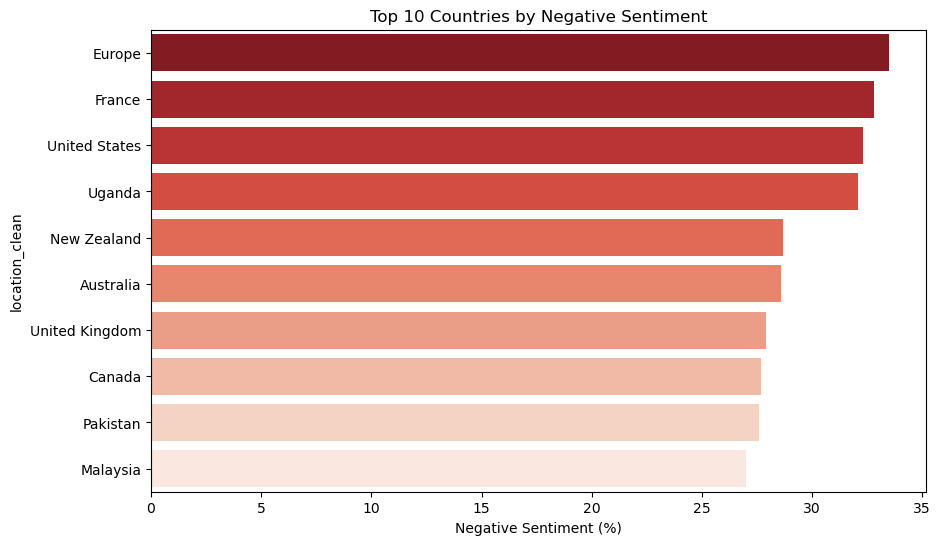

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(
    x=top_negative_pct['negative_pct'],
    y=top_negative_pct.index,
    palette='Reds_r'
)
plt.xlabel("Negative Sentiment (%)")
plt.title("Top 10 Countries by Negative Sentiment")
plt.show()


In [52]:
top_raw_negative = location_sentiment.sort_values(by='Negative', ascending=False).head(10)
top_raw_negative[['Negative', 'total']]


sentiment_label  Negative  total
location_clean                  
United States        5013  15529
India                2463  11674
United Kingdom       1513   5423
Australia            1230   4298
Canada                504   1821
South Africa          313   1465
Nigeria               293   1508
Kenya                 271   1109
Ireland               222    836
China                 196    757

In [54]:
df.to_csv('../data/sample_with_sentiment.csv', index=False)
